Andrew Koren

Sec 007

Research Question: Is my girlfriend and I's spending sustainable, will I be able to pay for tuition next semester?

My dataset is our bank statements

The document must contain:

Your name

Your section number

Your current research question

Links to any resources you will use and a brief description of how you will use them.

If you plan on using data for your project, you must also submit the specific dataset that you will be using. It is strongly recommended that you try to find a dataset that is either a CSV or Excel (.xlsx) file, but if you find a dataset that you are excited to use and it is not in one of those formats, contact your instructor to check and see if it will be possible for you to load that dataset in a Jupyter Notebook using the tools we’ve learned about in class. Datasets in the form of an SQL database are not good options for this course, unless you already have the skills necessary to work with such a database.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [12]:
##read and sort
import pandas as pd
fifththird = pd.read_csv('53.csv')
private = pd.read_csv('private.csv')
shared = pd.read_csv('shared.csv')

#shared.head()
#print(shared.keys())

shared['Description'] = shared.iloc[:,1].str.extract(r'Category:\s*(\w+)')
private['Description'] = private.iloc[:,1].str.extract(r'Category:\s*(\w+)')

shared = shared.dropna(subset='Description')
shared =  shared.iloc[:,:4]
private = private.dropna(subset='Description')
private = private.iloc[:,:4]

sshared = shared.sort_values(by='Description')
sprivate = private.sort_values(by='Description')

fifththird.keys()

fifththird['Type'], fifththird['Description'] = fifththird['Description'], fifththird['Type']
sfifththird = fifththird.dropna(subset='Description').sort_values(by='Description')
sfifththird.drop('Type',axis=1,inplace=True)

In [13]:
##combine and rename categories
expenses = pd.concat([sfifththird, sshared, sprivate], axis=0)
expenses = expenses.sort_values('Description').drop('Balance',axis=1)
keys = expenses['Description'].unique()
#print(keys,len(keys))

newkeys = ['Automotive', 'Entertainment / Dining', 'Entertainment / Dining',
 'Entertainment / Dining', 'Groceries', 'Health', 'Household / Utilities',
 'Household / Utilities', 'School', 'Shopping', 'Automotive', 'NaN']
#print(newkeys,len(newkeys))

for i in range(len(keys)):
    mask = expenses['Description'] == keys[i]
    expenses.loc[mask, 'Description'] = newkeys[i]

expenses = expenses.dropna(subset='Description')


In [14]:
##stuff to prepare for plotting
expenses['Date']=pd.to_datetime(expenses['Date'])
expenses['int']=(expenses['Date'] - pd.Timestamp('2023-10-01')).dt.days
expenses = expenses[expenses['Amount']<=0]

expenses_per_day = expenses.groupby('Date')['Amount'].sum().reset_index()
expense_dates = (expenses_per_day['Date'] - pd.Timestamp('2023-10-01')).dt.days

expenses.head()


,Date,Description,Amount,int
4,2023-11-02,Automotive,-16.22,32
11,2023-10-30,Automotive,-44.41,29
6,2023-11-01,Automotive,-14.50,31
3,2023-11-02,Entertainment / Dining,-23.30,32
5,2023-11-01,Entertainment / Dining,-2.29,31


In [15]:
##Totaling expenses loop
total_expenses = []
debit = 0

for i in range(len(expense_dates)):
    debit += expenses_per_day['Amount'][i]
    total_expenses.append(debit)

total_expenses


[-59.3,
 -227.95999999999998,
 -375.15,
 -1248.28,
 -1466.4,
 -1558.18,
 -1883.5500000000002,
 -2720.3700000000003,
 -2868.6700000000005,
 -2925.7300000000005,
 -3001.7200000000003,
 -3085.3300000000004,
 -3464.5400000000004,
 -3651.4200000000005,
 -3783.2000000000007,
 -3906.600000000001,
 -4215.85,
 -4673.21,
 -4685.16,
 -4734.92,
 -5072.92,
 -5109.03]

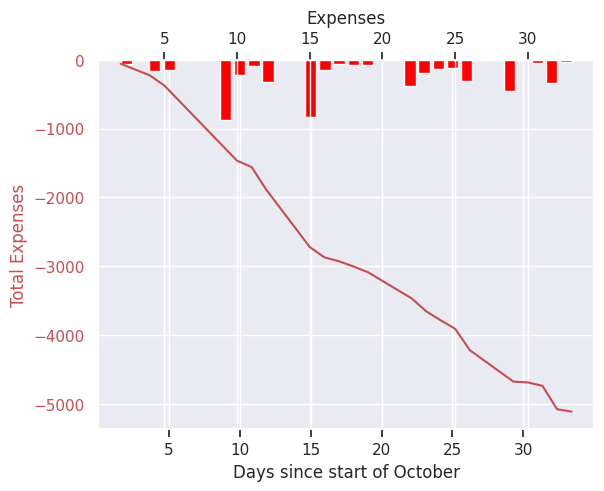

In [16]:
fig, ax1 = plt.subplots()

ax1.bar(expense_dates,expenses_per_day['Amount'],color='red')
ax1.set_xlabel('Days since start of October')
ax1.set_ylabel('Total Expenses', color='r')
ax1.tick_params(axis='y', labelcolor='r')


#ax2=ax1.twinx()
#ax2.scatter(expenses['int'],expenses['Amount'],color='blue',s=5)
#ax2.set_ylabel('Purchase Value', color='b')
#ax2.tick_params(axis='y', labelcolor='b')
#ax2.set_ylim(-200,0)
#ax2.grid()
#
ax3=ax1.twiny()
ax3.plot(expense_dates,total_expenses,color='r')

#plt.xlabel('Days Since October 1st')
plt.title('Expenses')
plt.show()


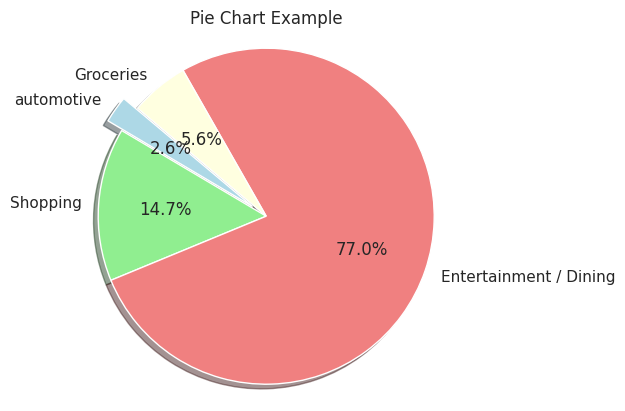

In [17]:
automotive_fees = expenses[expenses['Description']=='Automotive']
shopping_fees = expenses[expenses['Description']=='Shopping']
fun_fees = expenses[expenses['Description']=='Entertainment / Dining']
grocery_fees = expenses[expenses['Description']=='Groceries']


# Create data
labels = ['automotive', 'Shopping', 'Entertainment / Dining', 'Groceries']
sizes = [abs(automotive_fees['Amount'].sum()), abs(shopping_fees['Amount'].sum()), abs(fun_fees['Amount'].sum()), abs(grocery_fees['Amount'].sum())]
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
explode = (0.1, 0, 0, 0)  # Explode the first slice (Category 1)

# Create a pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Add a title
plt.title('Pie Chart Example')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()


In [18]:
expenses['Description'].unique()
expenses[expenses['Description'] == 'Household / Utilities']

,Date,Description,Amount,int
142,2023-10-23,Household / Utilities,-50.00,22
108,2023-10-30,Household / Utilities,-41.03,29
143,2023-10-23,Household / Utilities,-50.00,22
137,2023-10-24,Household / Utilities,-60.00,23
136,2023-10-24,Household / Utilities,-90.00,23


Text(0.5, 1.0, 'October Expenses')

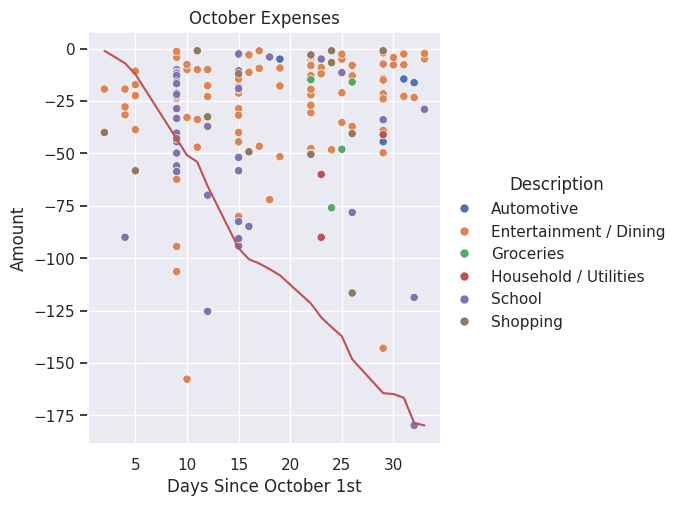

In [19]:
import seaborn as sns


#plt.figure(figsize=(15,60))

sns.set_theme(style='darkgrid')

sns.relplot(x=expenses['int'],y=expenses['Amount'], hue='Description', data=expenses)#,legend=False)
plt.xlabel('Days Since October 1st')

ax2 = plt.gca().twinx()
ax2.set_yticks([])  # Hide the ticks
ax2.set_yticklabels([])  # Hide the tick labels
ax2.spines['right'].set_visible(False)  # Hide the right spine
ax2.spines['left'].set_visible(False)   # Hide the left spine
#plt.tight_layout()
#handles, labels = plt.gca().get_legend_handles_labels()
#plt.legend(handles=handles, labels=labels, loc='upper right')


sns.lineplot(x=expense_dates,y=total_expenses,ax=ax2,color='r')
plt.title('October Expenses')
#expenses.head()


In [20]:
expenses_oct9 = expenses[expenses['Date']=='2023-10-09']
expenses_oct9

,Date,Description,Amount,int
